## Mission Hospital - Package Pricing

Mission Hospital started its operations on April 02, 2008 with the aim of providing highest quality patient care facilities to all individuals at affordable rates. This super specialty hospital located in Durgapur, West Bengal, India, specializes in cardiac surgeries. Many of its patients are from nearby states and neighboring countries, and are covered under different health schemes. Among hospitals in India, flat rate for different treatments is becoming popular, mainly owing to healthcare tourism and government schemes. Dr. Satyajit Bose, chairman of Mission Hospital, was considering adoption of a package pricing (flat fee) strategy under which patients would be provided a fixed price for their treatment at the time of admission. This would imply that the package price should be calculated by the hospital on the basis of patient's clinical and non-clinical information available at the time of admission. Flat fee (or package pricing) can result in a loss to the hospitals if they do not accurately estimate the treatment cost for a patient. The hospital faces the challenge of identifying the key factors that drive the total cost of treatment so that it can quote an appropriate price to the patient.

## Objective:

- Exploratory Data Analysis
- Finding outliers
- Splitting dataseta and cross validating models.
- Building linear regression model.
- Understanding OLS methods to estimate model parameters.
- Interpreting the coefficients of the model.
- How to find if the parameters estimated are significant?
- Making predictions using the model.
- Finding model residuals and analyzing it.
- Evaluating model efficiency using RMSE and R-Square values.
- Finding high residual and leverage points
- Variable transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
import statsmodels.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

### Loading the dataset

In [2]:
mission_df = pd.read_csv( "Mission Hospital-Case Data.csv" )

In [3]:
mission_df.head( 5 )

,SL.,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS_CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP HIGH,BP LOW,...,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL LENGTH OF STAY,LENGTH OF STAY ICU,LENGTH OF STAY WARD,IMPLANT USED,COST OF IMPLANT
0,1,58.0,M,MARRIED,other- heart,49,160,118,100.0,80.0,...,EMERGENCY,660293.0,474901,0,474901,25,12,13,Y,38000
1,2,59.0,M,MARRIED,CAD-DVD,41,155,78,70.0,50.0,...,EMERGENCY,809130.0,944819,96422,848397,41,20,21,Y,39690
2,3,82.0,M,MARRIED,CAD-TVD,47,164,100,110.0,80.0,...,ELECTIVE,362231.0,390000,30000,360000,18,9,9,N,0
3,4,46.0,M,MARRIED,CAD-DVD,80,173,122,110.0,80.0,...,EMERGENCY,629990.0,324910,0,324910,14,13,1,Y,89450
4,5,60.0,M,MARRIED,CAD-DVD,58,175,72,180.0,100.0,...,EMERGENCY,444876.0,254673,10000,244673,24,12,12,N,0


In [4]:
mission_df.columns

Index(['SL.', 'AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS_CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP HIGH', 'BP LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL COST TO HOSPITAL', 'TOTAL AMOUNT BILLED TO THE PATIENT',
       'CONCESSION', 'ACTUAL RECEIVABLE AMOUNT', 'TOTAL LENGTH OF STAY',
       'LENGTH OF STAY ICU', 'LENGTH OF STAY WARD', 'IMPLANT USED ',
       'COST OF IMPLANT'],
      dtype='object')

In [5]:
mission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 27 columns):
SL.                                   248 non-null int64
AGE                                   248 non-null float64
GENDER                                248 non-null object
MARITAL STATUS                        248 non-null object
KEY COMPLAINTS_CODE                   212 non-null object
BODY WEIGHT                           248 non-null int64
BODY HEIGHT                           248 non-null int64
HR PULSE                              248 non-null int64
BP HIGH                               225 non-null float64
BP LOW                                225 non-null float64
RR                                    248 non-null int64
PAST MEDICAL HISTORY CODE             75 non-null object
HB                                    246 non-null float64
UREA                                  235 non-null float64
CREATININE                            215 non-null float64
MODE OF ARRIVAL          

### Drop columns 'SL.' 

In [6]:
mission_df = mission_df.drop( 'SL.', axis = 1 )

### Change the column names

In [7]:
column_names = [str(col).replace( ' ', '_' ) for col in mission_df.columns]

In [8]:
column_names[0:10]

['AGE',
 'GENDER',
 'MARITAL_STATUS',
 'KEY_COMPLAINTS_CODE',
 'BODY_WEIGHT',
 'BODY_HEIGHT',
 'HR_PULSE',
 'BP_HIGH',
 'BP_LOW',
 'RR']

### Assigning new names

In [9]:
mission_df.columns = column_names

## Exploratory Data Analysis

### Distribution of Total Amount billed to patient

/Users/manaranjan/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


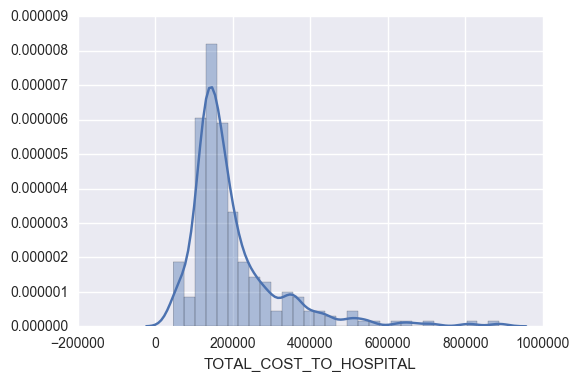

In [10]:
sn.distplot( mission_df.TOTAL_COST_TO_HOSPITAL )

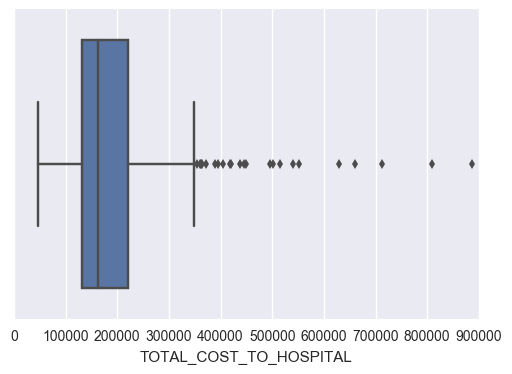

In [11]:
sn.boxplot( mission_df.TOTAL_COST_TO_HOSPITAL )

In [12]:
from scipy import stats

In [13]:
cost_iqr = stats.iqr( mission_df.TOTAL_COST_TO_HOSPITAL )

In [14]:
cost_75_percentile = mission_df.TOTAL_COST_TO_HOSPITAL.quantile( 0.75 )

In [15]:
outliers_costs = cost_75_percentile + 3 * cost_iqr

In [16]:
outliers_costs

487497.75

In [17]:
mission_df[mission_df.TOTAL_COST_TO_HOSPITAL > outliers_costs]

,AGE,GENDER,MARITAL_STATUS,KEY_COMPLAINTS_CODE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,...,TYPE_OF_ADMSN,TOTAL_COST_TO_HOSPITAL,TOTAL_AMOUNT_BILLED_TO_THE_PATIENT,CONCESSION,ACTUAL_RECEIVABLE_AMOUNT,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,IMPLANT_USED_,COST_OF_IMPLANT
0,58.00,M,MARRIED,other- heart,49,160,118,100.0,80.0,32,...,EMERGENCY,660293.0,474901,0,474901,25,12,13,Y,38000
1,59.00,M,MARRIED,CAD-DVD,41,155,78,70.0,50.0,28,...,EMERGENCY,809130.0,944819,96422,848397,41,20,21,Y,39690
3,46.00,M,MARRIED,CAD-DVD,80,173,122,110.0,80.0,24,...,EMERGENCY,629990.0,324910,0,324910,14,13,1,Y,89450
6,73.00,M,MARRIED,CAD-TVD,60,170,108,160.0,90.0,24,...,ELECTIVE,887350.0,660504,504,660000,15,15,0,N,0
10,61.00,M,MARRIED,CAD-DVD,64,170,99,140.0,80.0,24,...,ELECTIVE,514524.0,282000,15000,267000,21,10,11,Y,39690
11,45.00,F,MARRIED,other- heart,50,151,60,110.0,60.0,19,...,ELECTIVE,539976.0,194000,10000,184000,27,22,5,Y,20900
12,40.00,M,MARRIED,RHD,71,165,100,110.0,70.0,22,...,ELECTIVE,711616.0,556175,174,556001,17,10,7,Y,196848
14,68.00,F,UNMARRIED,CAD-DVD,51,123,66,120.0,80.0,20,...,EMERGENCY,495968.7,161250,0,161250,16,16,0,N,0
16,65.00,M,MARRIED,CAD-DVD,65,140,93,140.0,80.0,18,...,EMERGENCY,501897.0,388017,12017,376000,18,12,6,N,0
35,0.83,M,UNMARRIED,other- heart,6,68,120,NaN,NaN,22,...,ELECTIVE,551809.0,153700,37500,116200,32,30,2,N,0


In [18]:
pre_mission_df = mission_df

### Length of stay

/Users/manaranjan/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


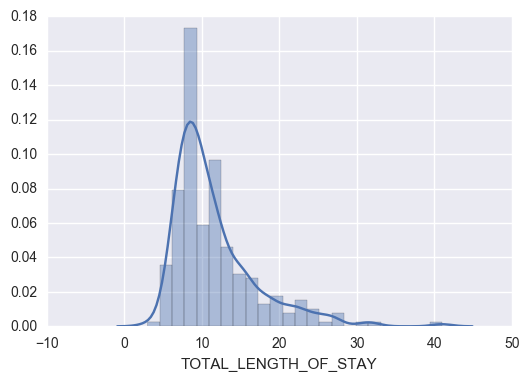

In [19]:
sn.distplot( mission_df.TOTAL_LENGTH_OF_STAY )

### Find distribution of following parameters

### Correlation between *Age* and *Amount Billed*

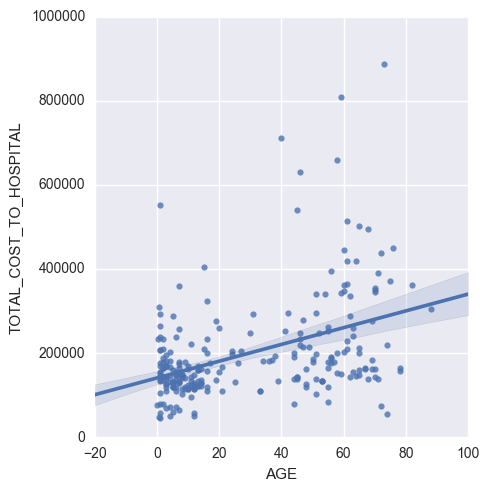

In [20]:
sn.lmplot( x = 'AGE', y = 'TOTAL_COST_TO_HOSPITAL', data = mission_df )

In [21]:
mission_df.columns

Index(['AGE', 'GENDER', 'MARITAL_STATUS', 'KEY_COMPLAINTS_CODE', 'BODY_WEIGHT',
       'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
       'PAST_MEDICAL_HISTORY_CODE', 'HB', 'UREA', 'CREATININE',
       'MODE_OF_ARRIVAL', 'STATE_AT_THE_TIME_OF_ARRIVAL', 'TYPE_OF_ADMSN',
       'TOTAL_COST_TO_HOSPITAL', 'TOTAL_AMOUNT_BILLED_TO_THE_PATIENT',
       'CONCESSION', 'ACTUAL_RECEIVABLE_AMOUNT', 'TOTAL_LENGTH_OF_STAY',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT_USED_',
       'COST_OF_IMPLANT'],
      dtype='object')

In [22]:
all_features = ['AGE', 'GENDER', 'MARITAL_STATUS', 'KEY_COMPLAINTS_CODE', 'BODY_WEIGHT',
       'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
       'PAST_MEDICAL_HISTORY_CODE', 'HB', 'UREA', 'CREATININE',
       'MODE_OF_ARRIVAL', 'STATE_AT_THE_TIME_OF_ARRIVAL', 'TYPE_OF_ADMSN',
       'TOTAL_COST_TO_HOSPITAL']

In [23]:
continuous_features = ['AGE','BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR', 'HB',
       'UREA', 'CREATININE', 'TOTAL_COST_TO_HOSPITAL']

In [24]:
categorical_features = list( set( all_features ) - set( continuous_features ) )

In [25]:
categorical_features

['PAST_MEDICAL_HISTORY_CODE',
 'GENDER',
 'KEY_COMPLAINTS_CODE',
 'MARITAL_STATUS',
 'MODE_OF_ARRIVAL',
 'STATE_AT_THE_TIME_OF_ARRIVAL',
 'TYPE_OF_ADMSN']

## Pairplot with all continuous features

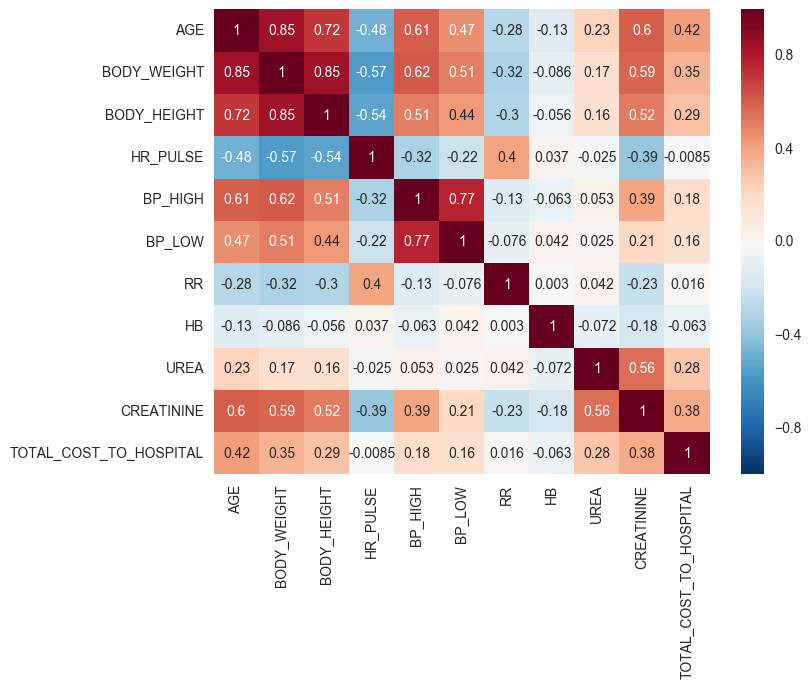

In [26]:
plt.figure( figsize = (8,6) )
sn.heatmap( mission_df[continuous_features].corr(), annot = True )

### Highly Correlated Variables

- BODY_HEIGHT and BODY_WEIGHT seem to be highly correlated. We can remove one of them.
- Or introduce a new variable called BMI = BODY_WEIGHT / BODY_HEIGHT

In [27]:
#mission_df['BMI'] = mission_df.BODY_WEIGHT / mission_df.BODY_HEIGHT

### Distribution of total cost for different medical history

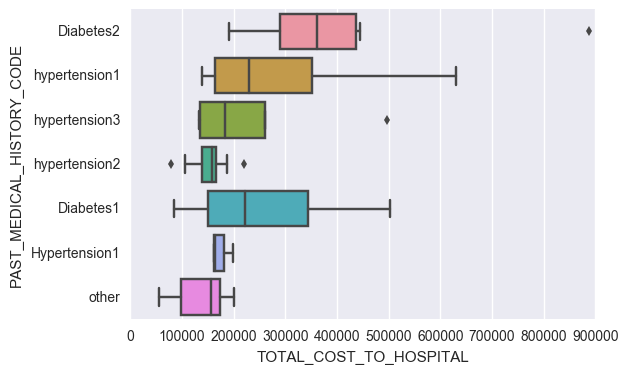

In [28]:
sn.boxplot( y = 'PAST_MEDICAL_HISTORY_CODE', 
           x = 'TOTAL_COST_TO_HOSPITAL', data = mission_df )

### Total Length of Stay and ICU stay for different medical history

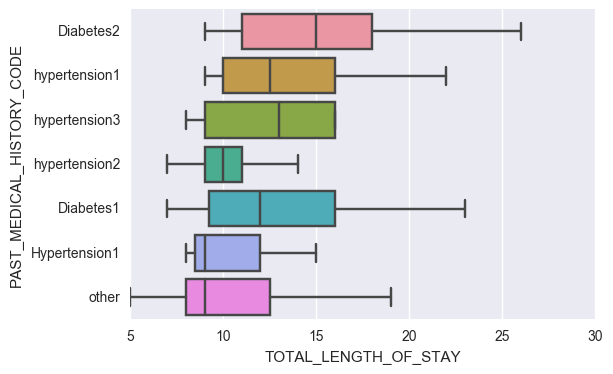

In [29]:
sn.boxplot( y = 'PAST_MEDICAL_HISTORY_CODE', x = 'TOTAL_LENGTH_OF_STAY', data = mission_df )

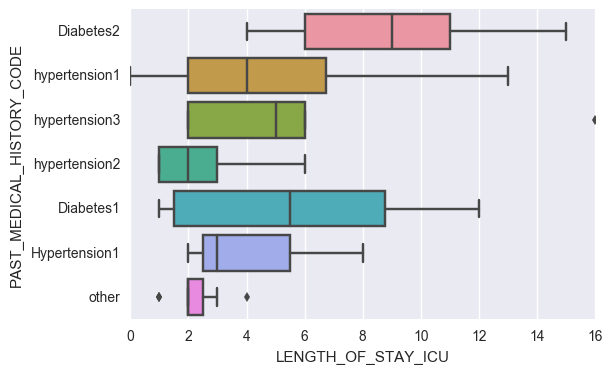

In [30]:
sn.boxplot( y = 'PAST_MEDICAL_HISTORY_CODE', 
           x = 'LENGTH_OF_STAY_ICU', data = mission_df )

### Distribution Plot for MODE_OF_ARRIVAL

/Users/manaranjan/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


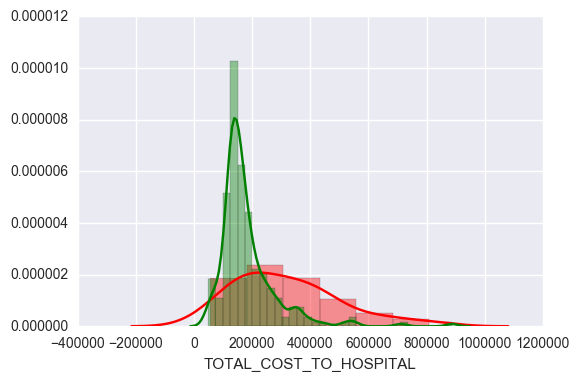

In [31]:
sn.distplot( mission_df[mission_df.MODE_OF_ARRIVAL == 'AMBULANCE']['TOTAL_COST_TO_HOSPITAL'], 
            color = 'r')
sn.distplot( mission_df[mission_df.MODE_OF_ARRIVAL == 'WALKED IN']['TOTAL_COST_TO_HOSPITAL'],
            color = 'g')

In [32]:
from scipy import stats

In [33]:
stats.ttest_ind( mission_df[mission_df.MODE_OF_ARRIVAL 
                            == 'AMBULANCE']['TOTAL_COST_TO_HOSPITAL'], 
               mission_df[mission_df.MODE_OF_ARRIVAL 
                          == 'WALKED IN']['TOTAL_COST_TO_HOSPITAL'])

Ttest_indResult(statistic=5.8512787114374527, pvalue=1.5763660926566531e-08)

### Cross Tabulation

In [34]:
pd.crosstab( mission_df.GENDER , mission_df.PAST_MEDICAL_HISTORY_CODE )

PAST_MEDICAL_HISTORY_CODE,Diabetes1,Diabetes2,Hypertension1,hypertension1,hypertension2,hypertension3,other
GENDER,,,,,,,
F,2,1,0,2,4,2,4
M,8,8,3,18,9,3,11


## Summary Statistics

In [35]:
mission_df[continuous_features].describe()

/Users/manaranjan/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,AGE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,HB,UREA,CREATININE,TOTAL_COST_TO_HOSPITAL
count,248.000000,248.000000,248.000000,248.000000,225.000000,225.000000,248.000000,246.000000,235.000000,215.000000,248.000000
mean,28.879839,37.536290,130.221774,92.229839,115.022222,71.875556,23.540323,12.934959,26.581702,0.746977,198723.330282
std,25.899358,23.122248,39.170901,20.308740,22.536368,15.313176,3.840756,3.099019,15.998367,0.548641,122587.492984
min,0.030000,2.000000,19.000000,41.000000,70.000000,39.000000,12.000000,5.000000,2.000000,0.100000,46093.000000
25%,6.000000,15.000000,105.000000,78.000000,NaN,NaN,22.000000,NaN,NaN,NaN,131652.750000
50%,15.500000,41.000000,147.500000,90.000000,NaN,NaN,24.000000,NaN,NaN,NaN,162660.500000
75%,55.000000,58.250000,160.000000,104.000000,NaN,NaN,24.000000,NaN,NaN,NaN,220614.000000
max,88.000000,85.000000,185.000000,155.000000,215.000000,140.000000,42.000000,26.000000,143.000000,5.200000,887350.000000


## Imputing missing records

In [36]:
mission_final_df = mission_df

### Imputing missing past medical history to None

In [37]:
mission_final_df['PAST_MEDICAL_HISTORY_CODE'
                ] = mission_final_df['PAST_MEDICAL_HISTORY_CODE'].fillna( 'None' )

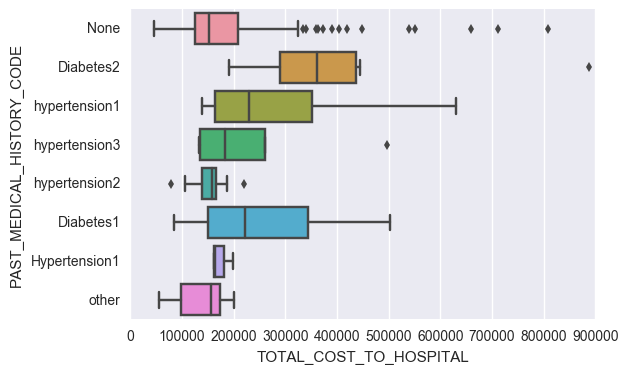

In [38]:
sn.boxplot( y = 'PAST_MEDICAL_HISTORY_CODE', 
           x = 'TOTAL_COST_TO_HOSPITAL', data = mission_df )

### *Mean* Imputation for other features

In [39]:
#mission_final_df["BP_HIGH"].fillna(mission_final_df["BP_HIGH"].mean(), inplace=True)
#mission_final_df["BP_LOW"].fillna(mission_final_df["BP_LOW"].mean(), inplace=True)
#mission_final_df["HB"].fillna(mission_final_df["HB"].mean(), inplace=True)
#mission_final_df["UREA"].fillna(mission_final_df["UREA"].mean(), inplace=True)
#mission_final_df["CREATININE"].fillna(mission_final_df["CREATININE"].mean(), inplace=True)

### Any more null values

In [40]:
mission_df.isnull().any()

AGE                                   False
GENDER                                False
MARITAL_STATUS                        False
KEY_COMPLAINTS_CODE                    True
BODY_WEIGHT                           False
BODY_HEIGHT                           False
HR_PULSE                              False
BP_HIGH                                True
BP_LOW                                 True
RR                                    False
PAST_MEDICAL_HISTORY_CODE             False
HB                                     True
UREA                                   True
CREATININE                             True
MODE_OF_ARRIVAL                       False
STATE_AT_THE_TIME_OF_ARRIVAL          False
TYPE_OF_ADMSN                         False
TOTAL_COST_TO_HOSPITAL                False
TOTAL_AMOUNT_BILLED_TO_THE_PATIENT    False
CONCESSION                            False
ACTUAL_RECEIVABLE_AMOUNT              False
TOTAL_LENGTH_OF_STAY                  False
LENGTH_OF_STAY_ICU              

In [41]:
mission_final_df['KEY_COMPLAINTS_CODE'
                ] = mission_final_df['KEY_COMPLAINTS_CODE'].fillna( 'None' )

In [42]:
mission_final_df = mission_final_df.dropna()

In [43]:
len( mission_final_df )

191

In [44]:
mission_final_df.columns

Index(['AGE', 'GENDER', 'MARITAL_STATUS', 'KEY_COMPLAINTS_CODE', 'BODY_WEIGHT',
       'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
       'PAST_MEDICAL_HISTORY_CODE', 'HB', 'UREA', 'CREATININE',
       'MODE_OF_ARRIVAL', 'STATE_AT_THE_TIME_OF_ARRIVAL', 'TYPE_OF_ADMSN',
       'TOTAL_COST_TO_HOSPITAL', 'TOTAL_AMOUNT_BILLED_TO_THE_PATIENT',
       'CONCESSION', 'ACTUAL_RECEIVABLE_AMOUNT', 'TOTAL_LENGTH_OF_STAY',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT_USED_',
       'COST_OF_IMPLANT'],
      dtype='object')

## Summary Statistics

In [45]:
mission_df[continuous_features].describe()

/Users/manaranjan/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,AGE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,HB,UREA,CREATININE,TOTAL_COST_TO_HOSPITAL
count,248.000000,248.000000,248.000000,248.000000,225.000000,225.000000,248.000000,246.000000,235.000000,215.000000,248.000000
mean,28.879839,37.536290,130.221774,92.229839,115.022222,71.875556,23.540323,12.934959,26.581702,0.746977,198723.330282
std,25.899358,23.122248,39.170901,20.308740,22.536368,15.313176,3.840756,3.099019,15.998367,0.548641,122587.492984
min,0.030000,2.000000,19.000000,41.000000,70.000000,39.000000,12.000000,5.000000,2.000000,0.100000,46093.000000
25%,6.000000,15.000000,105.000000,78.000000,NaN,NaN,22.000000,NaN,NaN,NaN,131652.750000
50%,15.500000,41.000000,147.500000,90.000000,NaN,NaN,24.000000,NaN,NaN,NaN,162660.500000
75%,55.000000,58.250000,160.000000,104.000000,NaN,NaN,24.000000,NaN,NaN,NaN,220614.000000
max,88.000000,85.000000,185.000000,155.000000,215.000000,140.000000,42.000000,26.000000,143.000000,5.200000,887350.000000


In [46]:
medical_hist_counts = mission_final_df.groupby( 
    'PAST_MEDICAL_HISTORY_CODE' ).size().reset_index( name = 'hcounts')

In [47]:
medical_hist_counts

,PAST_MEDICAL_HISTORY_CODE,hcounts
0,Diabetes1,9
1,Diabetes2,9
2,Hypertension1,3
3,None,123
4,hypertension1,17
5,hypertension2,10
6,hypertension3,5
7,other,15


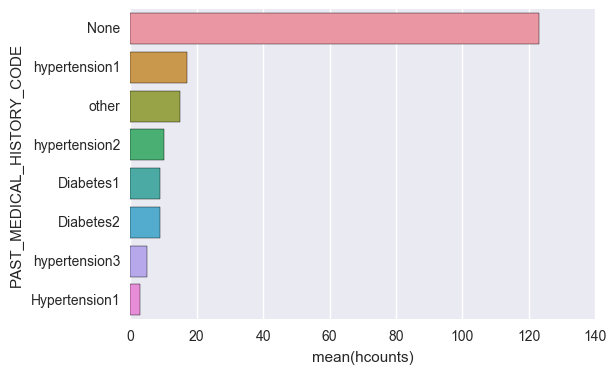

In [48]:
sn.barplot( y = 'PAST_MEDICAL_HISTORY_CODE', 
           x = 'hcounts', 
           data = medical_hist_counts.sort_values( 'hcounts', ascending = False ) )

In [49]:
key_complaints_counts = mission_final_df.groupby( 
    'KEY_COMPLAINTS_CODE' ).size().reset_index( name = 'hcounts')

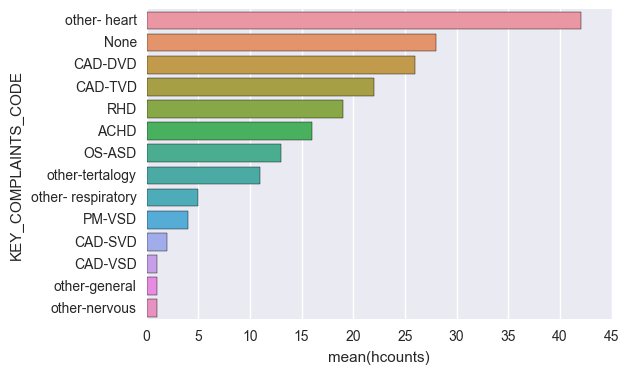

In [50]:
sn.barplot( y = 'KEY_COMPLAINTS_CODE', 
           x = 'hcounts', 
           data = key_complaints_counts.sort_values( 'hcounts', ascending = False ) )

# Building Linear Regression Model

## Convert Categorical Features to Dummy Variables

In [51]:
def create_dummies( df, colname ):
  col_dummies = pd.get_dummies(df[colname], prefix=colname)
  col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
  df = pd.concat([df, col_dummies], axis=1)
  df.drop( colname, axis = 1, inplace = True )
  return df

In [52]:
create_dummies( mission_final_df, 'PAST_MEDICAL_HISTORY_CODE' )[0:5]

,AGE,GENDER,MARITAL_STATUS,KEY_COMPLAINTS_CODE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,...,LENGTH_OF_STAY_WARD,IMPLANT_USED_,COST_OF_IMPLANT,PAST_MEDICAL_HISTORY_CODE_Diabetes2,PAST_MEDICAL_HISTORY_CODE_Hypertension1,PAST_MEDICAL_HISTORY_CODE_None,PAST_MEDICAL_HISTORY_CODE_hypertension1,PAST_MEDICAL_HISTORY_CODE_hypertension2,PAST_MEDICAL_HISTORY_CODE_hypertension3,PAST_MEDICAL_HISTORY_CODE_other
0,58.0,M,MARRIED,other- heart,49,160,118,100.0,80.0,32,...,13,Y,38000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,59.0,M,MARRIED,CAD-DVD,41,155,78,70.0,50.0,28,...,21,Y,39690,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,82.0,M,MARRIED,CAD-TVD,47,164,100,110.0,80.0,20,...,9,N,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46.0,M,MARRIED,CAD-DVD,80,173,122,110.0,80.0,24,...,1,Y,89450,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,60.0,M,MARRIED,CAD-DVD,58,175,72,180.0,100.0,18,...,12,N,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
for each_cat in categorical_features:
    mission_final_df = create_dummies( mission_final_df, each_cat )

In [54]:
mission_final_df[0:5]

,AGE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,HB,UREA,CREATININE,...,KEY_COMPLAINTS_CODE_RHD,KEY_COMPLAINTS_CODE_other- heart,KEY_COMPLAINTS_CODE_other- respiratory,KEY_COMPLAINTS_CODE_other-general,KEY_COMPLAINTS_CODE_other-nervous,KEY_COMPLAINTS_CODE_other-tertalogy,MARITAL_STATUS_UNMARRIED,MODE_OF_ARRIVAL_TRANSFERRED,MODE_OF_ARRIVAL_WALKED IN,TYPE_OF_ADMSN_EMERGENCY
0,58.0,49,160,118,100.0,80.0,32,11.0,33.0,0.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,59.0,41,155,78,70.0,50.0,28,11.0,95.0,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,82.0,47,164,100,110.0,80.0,20,12.0,15.0,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,46.0,80,173,122,110.0,80.0,24,12.0,74.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60.0,58,175,72,180.0,100.0,18,10.0,48.0,1.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
mission_final_df.columns

Index(['AGE', 'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW',
       'RR', 'HB', 'UREA', 'CREATININE', 'TOTAL_COST_TO_HOSPITAL',
       'TOTAL_AMOUNT_BILLED_TO_THE_PATIENT', 'CONCESSION',
       'ACTUAL_RECEIVABLE_AMOUNT', 'TOTAL_LENGTH_OF_STAY',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT_USED_',
       'COST_OF_IMPLANT', 'PAST_MEDICAL_HISTORY_CODE_Diabetes2',
       'PAST_MEDICAL_HISTORY_CODE_Hypertension1',
       'PAST_MEDICAL_HISTORY_CODE_None',
       'PAST_MEDICAL_HISTORY_CODE_hypertension1',
       'PAST_MEDICAL_HISTORY_CODE_hypertension2',
       'PAST_MEDICAL_HISTORY_CODE_hypertension3',
       'PAST_MEDICAL_HISTORY_CODE_other', 'GENDER_M',
       'KEY_COMPLAINTS_CODE_CAD-DVD', 'KEY_COMPLAINTS_CODE_CAD-SVD',
       'KEY_COMPLAINTS_CODE_CAD-TVD', 'KEY_COMPLAINTS_CODE_CAD-VSD',
       'KEY_COMPLAINTS_CODE_None', 'KEY_COMPLAINTS_CODE_OS-ASD',
       'KEY_COMPLAINTS_CODE_PM-VSD', 'KEY_COMPLAINTS_CODE_RHD',
       'KEY_COMPLAINTS_CODE_other- heart',

In [56]:
non_features = ['TOTAL_AMOUNT_BILLED_TO_THE_PATIENT', 'CONCESSION',
       'ACTUAL_RECEIVABLE_AMOUNT', 'TOTAL_LENGTH_OF_STAY',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT_USED_',
       'COST_OF_IMPLANT', 'TOTAL_COST_TO_HOSPITAL']

In [57]:
X_features = list( set( mission_final_df.columns ) - set( non_features ) )

In [58]:
X_features

['RR',
 'PAST_MEDICAL_HISTORY_CODE_other',
 'KEY_COMPLAINTS_CODE_PM-VSD',
 'KEY_COMPLAINTS_CODE_RHD',
 'PAST_MEDICAL_HISTORY_CODE_hypertension3',
 'HB',
 'KEY_COMPLAINTS_CODE_other-nervous',
 'KEY_COMPLAINTS_CODE_CAD-TVD',
 'PAST_MEDICAL_HISTORY_CODE_hypertension1',
 'CREATININE',
 'MODE_OF_ARRIVAL_WALKED IN',
 'MODE_OF_ARRIVAL_TRANSFERRED',
 'AGE',
 'UREA',
 'PAST_MEDICAL_HISTORY_CODE_None',
 'BP_LOW',
 'KEY_COMPLAINTS_CODE_CAD-DVD',
 'KEY_COMPLAINTS_CODE_other-general',
 'PAST_MEDICAL_HISTORY_CODE_Diabetes2',
 'KEY_COMPLAINTS_CODE_other-tertalogy',
 'KEY_COMPLAINTS_CODE_CAD-VSD',
 'KEY_COMPLAINTS_CODE_None',
 'GENDER_M',
 'TYPE_OF_ADMSN_EMERGENCY',
 'KEY_COMPLAINTS_CODE_other- respiratory',
 'KEY_COMPLAINTS_CODE_CAD-SVD',
 'MARITAL_STATUS_UNMARRIED',
 'KEY_COMPLAINTS_CODE_other- heart',
 'BP_HIGH',
 'BODY_HEIGHT',
 'PAST_MEDICAL_HISTORY_CODE_Hypertension1',
 'HR_PULSE',
 'BODY_WEIGHT',
 'PAST_MEDICAL_HISTORY_CODE_hypertension2',
 'KEY_COMPLAINTS_CODE_OS-ASD']

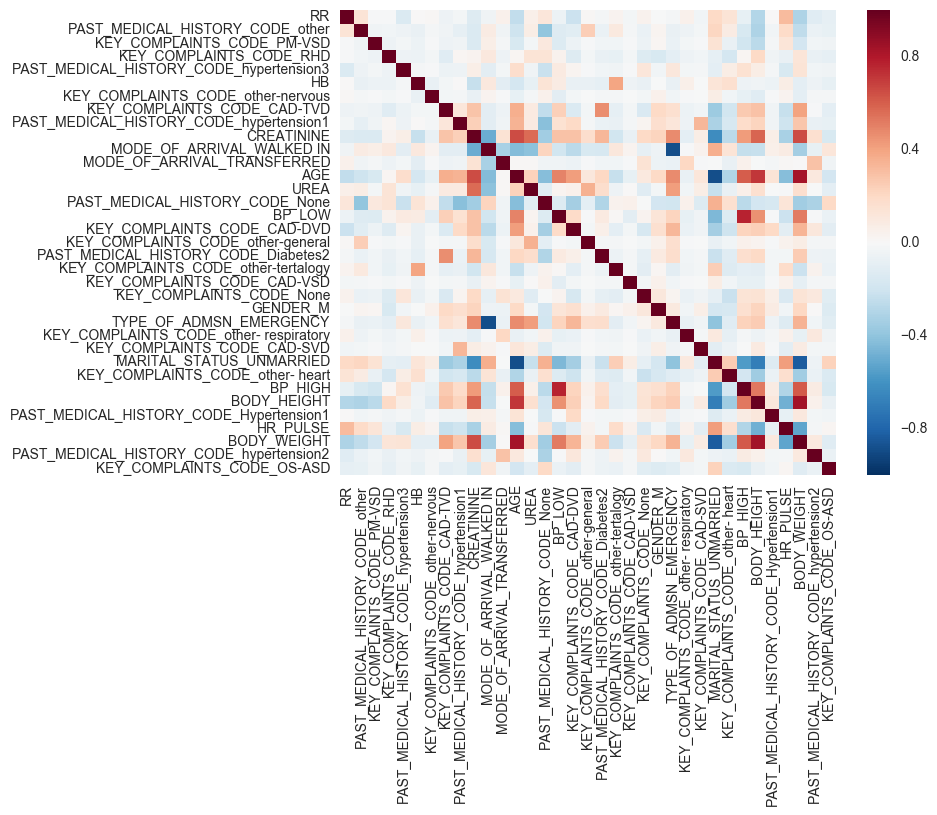

In [59]:
plt.figure( figsize = (8,6) )
sn.heatmap( mission_final_df[X_features].corr() )

In [60]:
remove_cols = ['MODE_OF_ARRIVAL_WALKED IN', 
               'BODY_WEIGHT', 'HIGH_BP', 
               'MARITAL_STATUS_UNMARRIED', 
               'CREATININE']

In [61]:
#X_features = list( set( X_features )  - set( remove_cols ) )

In [62]:
X_features

['RR',
 'PAST_MEDICAL_HISTORY_CODE_other',
 'KEY_COMPLAINTS_CODE_PM-VSD',
 'KEY_COMPLAINTS_CODE_RHD',
 'PAST_MEDICAL_HISTORY_CODE_hypertension3',
 'HB',
 'KEY_COMPLAINTS_CODE_other-nervous',
 'KEY_COMPLAINTS_CODE_CAD-TVD',
 'PAST_MEDICAL_HISTORY_CODE_hypertension1',
 'CREATININE',
 'MODE_OF_ARRIVAL_WALKED IN',
 'MODE_OF_ARRIVAL_TRANSFERRED',
 'AGE',
 'UREA',
 'PAST_MEDICAL_HISTORY_CODE_None',
 'BP_LOW',
 'KEY_COMPLAINTS_CODE_CAD-DVD',
 'KEY_COMPLAINTS_CODE_other-general',
 'PAST_MEDICAL_HISTORY_CODE_Diabetes2',
 'KEY_COMPLAINTS_CODE_other-tertalogy',
 'KEY_COMPLAINTS_CODE_CAD-VSD',
 'KEY_COMPLAINTS_CODE_None',
 'GENDER_M',
 'TYPE_OF_ADMSN_EMERGENCY',
 'KEY_COMPLAINTS_CODE_other- respiratory',
 'KEY_COMPLAINTS_CODE_CAD-SVD',
 'MARITAL_STATUS_UNMARRIED',
 'KEY_COMPLAINTS_CODE_other- heart',
 'BP_HIGH',
 'BODY_HEIGHT',
 'PAST_MEDICAL_HISTORY_CODE_Hypertension1',
 'HR_PULSE',
 'BODY_WEIGHT',
 'PAST_MEDICAL_HISTORY_CODE_hypertension2',
 'KEY_COMPLAINTS_CODE_OS-ASD']

### Split the datasets into train and test datasets

In [63]:
from sklearn.cross_validation import train_test_split

In [64]:
Y = mission_final_df['TOTAL_COST_TO_HOSPITAL']
X = smf.add_constant( mission_final_df[X_features] )

In [65]:
train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.7,
                                                    random_state = 42)

In [66]:
len( train_X )

133

In [67]:
len( test_y )

58

In [68]:
lin = smf.OLS( train_y, train_X )
lm = lin.fit()

In [69]:
lm.params

const                                     -3.518188e+05
RR                                         8.366396e+03
PAST_MEDICAL_HISTORY_CODE_other            5.389567e+04
KEY_COMPLAINTS_CODE_PM-VSD                 7.507448e+04
KEY_COMPLAINTS_CODE_RHD                    6.364142e+04
PAST_MEDICAL_HISTORY_CODE_hypertension3    1.132926e+05
HB                                        -2.544453e+03
KEY_COMPLAINTS_CODE_other-nervous         -1.229618e-08
KEY_COMPLAINTS_CODE_CAD-TVD                6.839651e+04
PAST_MEDICAL_HISTORY_CODE_hypertension1    8.970119e+04
CREATININE                                 2.873059e+04
MODE_OF_ARRIVAL_WALKED IN                  8.367517e+04
MODE_OF_ARRIVAL_TRANSFERRED                6.370666e+04
AGE                                        2.173980e+03
UREA                                       7.305523e+02
PAST_MEDICAL_HISTORY_CODE_None             7.184139e+04
BP_LOW                                    -2.510890e+02
KEY_COMPLAINTS_CODE_CAD-DVD                1.829

In [70]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Ordinary least squares
========================================================================================================
Model:                         OLS                              Adj. R-squared:               0.445     
Dependent Variable:            TOTAL_COST_TO_HOSPITAL           AIC:                          3470.2939 
Date:                          2017-07-26 12:33                 BIC:                          3568.5658 
No. Observations:              133                              Log-Likelihood:               -1701.1   
Df Model:                      33                               F-statistic:                  4.213     
Df Residuals:                  99                               Prob (F-statistic):           1.56e-08  
R-squared:                     0.584                            Scale:                        1.0127e+10
--------------------------------------------------------------------------------------------------------
                                           Coef.       Std.Err.     t    P>|t|     [0.025       0.975]  
--------------------------------------------------------------------------------------------------------
const                                   -351818.7571 194188.4706 -1.8117 0.0731 -737130.8123  33493.2982
RR                                         8366.3962   3151.0889  2.6551 0.0092    2113.9522  14618.8403
PAST_MEDICAL_HISTORY_CODE_other           53895.6677  59816.8293  0.9010 0.3698  -64793.8989 172585.2343
KEY_COMPLAINTS_CODE_PM-VSD                75074.4831  84187.7735  0.8918 0.3747  -91972.3242 242121.2904
KEY_COMPLAINTS_CODE_RHD                   63641.4189  45929.0266  1.3856 0.1690  -27491.7341 154774.5720
PAST_MEDICAL_HISTORY_CODE_hypertension3  113292.5876  69198.2816  1.6372 0.1048  -24011.8158 250596.9911
HB                                        -2544.4528   3525.6183 -0.7217 0.4722   -9540.0445   4451.1389
KEY_COMPLAINTS_CODE_other-nervous            -0.0000      0.0000 -2.5214 0.0133      -0.0000     -0.0000
KEY_COMPLAINTS_CODE_CAD-TVD               68396.5128  56884.1687  1.2024 0.2321  -44474.0190 181267.0446
PAST_MEDICAL_HISTORY_CODE_hypertension1   89701.1864  51800.5434  1.7317 0.0864  -13082.3300 192484.7027
CREATININE                                28730.5854  37615.8375  0.7638 0.4468  -45907.3971 103368.5678
MODE_OF_ARRIVAL_WALKED IN                 83675.1697 114614.4403  0.7301 0.4671 -143744.7455 311095.0850
MODE_OF_ARRIVAL_TRANSFERRED               63706.6596 138401.1501  0.4603 0.6463 -210911.2484 338324.5677
AGE                                        2173.9802    885.9030  2.4540 0.0159     416.1565   3931.8039
UREA                                        730.5523    771.7583  0.9466 0.3461    -800.7836   2261.8881
PAST_MEDICAL_HISTORY_CODE_None            71841.3894  46325.8090  1.5508 0.1241  -20079.0661 163761.8450
BP_LOW                                     -251.0890   1023.5542 -0.2453 0.8067   -2282.0425   1779.8645
KEY_COMPLAINTS_CODE_CAD-DVD              182942.2741  56994.4986  3.2098 0.0018   69852.8238 296031.7244
KEY_COMPLAINTS_CODE_other-general       -257986.8594 125935.6106 -2.0486 0.0432 -507870.4327  -8103.2860
PAST_MEDICAL_HISTORY_CODE_Diabetes2      172956.5653  57024.9864  3.0330 0.0031   59806.6205 286106.5100
KEY_COMPLAINTS_CODE_other-tertalogy       48426.2428  55285.2986  0.8759 0.3832  -61271.7838 158124.2695
KEY_COMPLAINTS_CODE_CAD-VSD               49176.2925 109219.0115  0.4503 0.6535 -167537.9215 265890.5065
KEY_COMPLAINTS_CODE_None                   5472.9928  46172.8147  0.1185 0.9059  -86143.8888  97089.8744
GENDER_M                                 -21739.3854  22228.0289 -0.9780 0.3304  -65844.6171  22365.8462
TYPE_OF_ADMSN_EMERGENCY                   86339.7607 113712.1236  0.7593 0.4495 -139289.7626 311969.2840
KEY_COMPLAINTS_CODE_other- respiratory    -5489.4255  73220.2440 -0.0750 0.9404 -150774.2749 139795.423

In [71]:
lm.rsquared_adj

0.44547587208048522

## Find Significant Variables

In [72]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [73]:
get_significant_vars( lm )

['RR',
 'KEY_COMPLAINTS_CODE_other-nervous',
 'AGE',
 'KEY_COMPLAINTS_CODE_CAD-DVD',
 'KEY_COMPLAINTS_CODE_other-general',
 'PAST_MEDICAL_HISTORY_CODE_Diabetes2',
 'BODY_HEIGHT']

## Building the model with significant variables

columns_set = X_features
selected = []
current_score, best_new_score = 0.0, 0.0
while columns_set and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in columns_set:
            r_squared = smf.OLS( train_y, train_X ).fit().rsquared_adj
            scores_with_candidates.append((r_squared, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            columns_set.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
final_lm = smf.ols( train_y, train_X[selected]).fit()

In [74]:
predict_y = lm.predict( test_X )

### Plot the residuals

In [75]:
residuals = test_y - predict_y

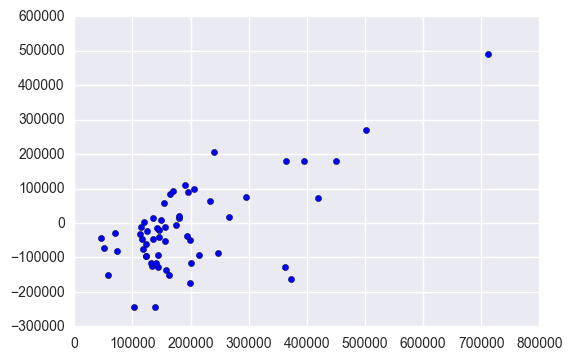

In [76]:
plt.scatter( y = residuals, x = test_y )

### Normality Test for residuals

/Users/manaranjan/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


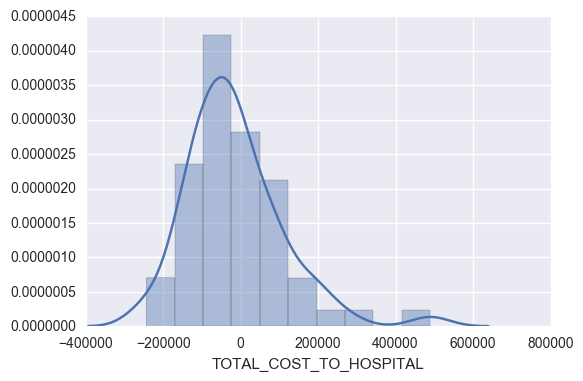

In [77]:
sn.distplot( residuals )

In [78]:
from scipy import stats

In [79]:
stats.normaltest( residuals )

NormaltestResult(statistic=22.444989417057077, pvalue=1.3370032867803982e-05)

#### Note:

The pvalues is less than 0.05, which signifies that the residuals do not follow normal distribution. Null hypothesis is it follows normal distribution.

### QQ Plot

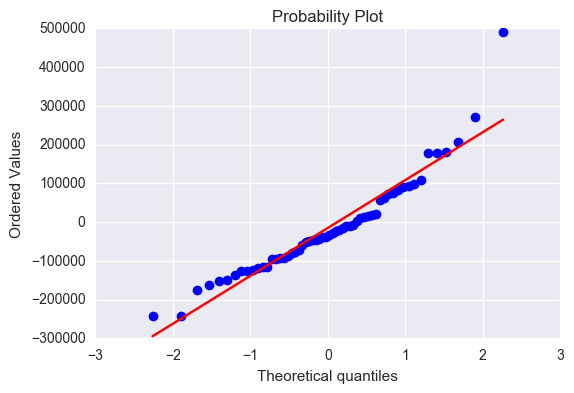

In [80]:
stats.probplot( residuals, dist="norm", plot=plt )
plt.show()

In [81]:
from statsmodels.graphics.regressionplots import *

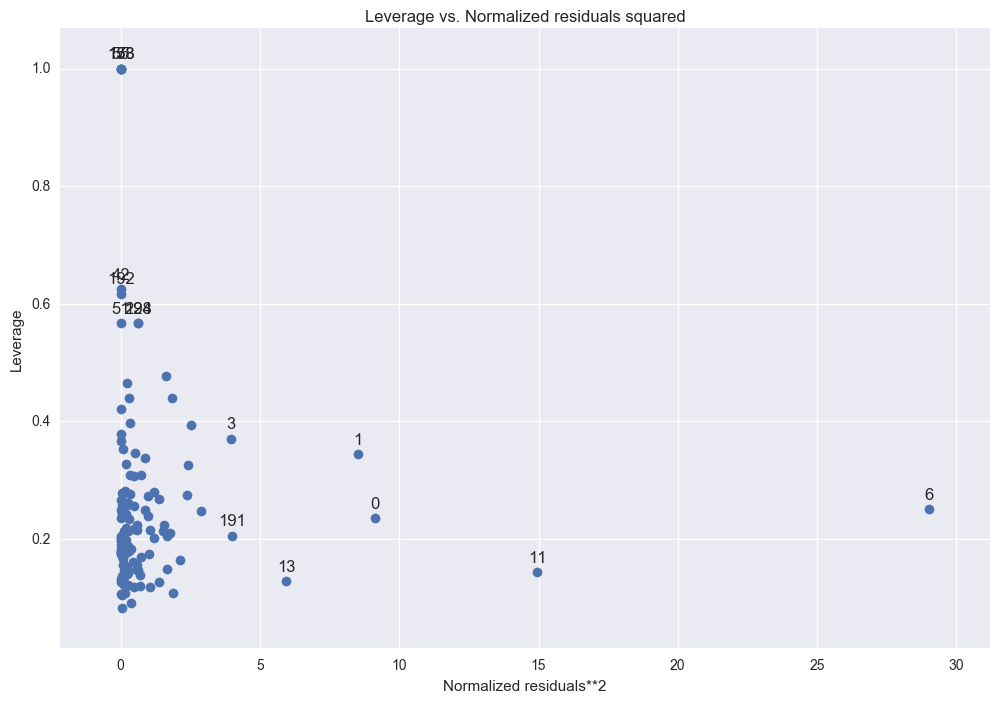

In [82]:
fig, ax = plt.subplots( figsize = ( 12, 8 ) )
fig = plot_leverage_resid2(lm, ax=ax, alpha = 0.05)

In [83]:
#fig, ax = plt.subplots( figsize = ( 12, 8 ) )
#fig = smf.graphics.influence_plot(lm, ax=ax, criterion="cooks")

In [84]:
mission_df[mission_df.TOTAL_COST_TO_HOSPITAL > outliers_costs]['TOTAL_COST_TO_HOSPITAL']

0     660293.0
1     809130.0
3     629990.0
6     887350.0
10    514524.0
11    539976.0
12    711616.0
14    495968.7
16    501897.0
35    551809.0
Name: TOTAL_COST_TO_HOSPITAL, dtype: float64

## Remove outliers and build the model
- check the r-squared values
- draw the residuals
- check for normality
- Draw the QQ Plot

In [85]:
# An example of removing row indexes 1,3,6
#mission_final_df = mission_final_df.drop( [0,1,3,6,11,13,191], axis = 0)  

## Log transformation of Y 

- check the r-squared values
- draw the residuals
- check for normality
- Draw the QQ Plot

In [86]:
#Y = np.log( mission_final_df['TOTAL_COST_TO_HOSPITAL'] )
#X = smf.add_constant( mission_final_df[X_features] )